In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import itertools
import scipy.stats
import copy

import os, sys

project_root = '/user_data/mmhender/featsynth/'
# sys.path.append(os.path.join(project_root, 'code'))
sys.path.insert(0, os.path.join(project_root, 'code'))
from utils import stats_utils, plot_utils
from behav_analysis import analyze_expt4

figpath = os.path.join(project_root, 'figures_raw')

In [2]:
super_names, super_cbinds, basic_names, basic_inds, \
        super_names_long, super_inds_long, n_basic, n_super, n_basic_each_super = \
            analyze_expt4.get_categ_info()

super_names_plot = copy.deepcopy(super_names)
ind = np.where(np.isin(super_names, 'musical_instrument'))[0][0]
super_names_plot[ind] = 'instrument'


trial_data_all, subjects, cue_level_names, image_type_names = analyze_expt4.load_data()
 
n_subjects = len(subjects)
n_cue_levels = len(cue_level_names)
n_image_types = len(image_type_names)

acc_by_condition, dprime_by_condition, propyes_by_condition, rt_by_condition = analyze_expt4.get_perf_by_cond()

acc_by_run, dprime_by_run, rt_by_run = analyze_expt4.get_perf_by_run()

acc_by_supcat, dprime_by_supcat, rt_by_supcat = analyze_expt4.get_perf_by_supercateg()

acc_by_nat, dprime_by_nat, rt_by_nat = analyze_expt4.get_perf_by_nat()

print(subjects)

cue_level_names = ['Fine','Coarse']

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]


Text(0.5, 1.0, 'Response Time\n(n=30)')

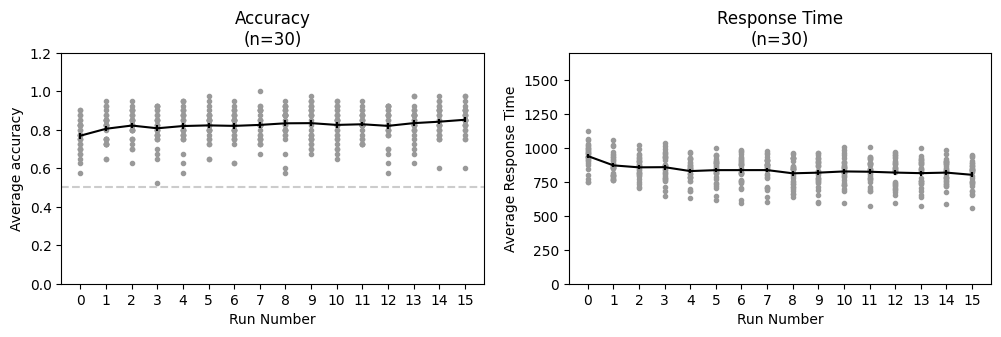

In [11]:
plt.figure(figsize=(12,3))

plt.subplot(1,2,1)
plot_vals = acc_by_run

n_runs = plot_vals.shape[1]
meanvals = np.mean(plot_vals, axis=0)
semvals = np.std(plot_vals, axis=0)/np.sqrt(plot_vals.shape[0])

for si in range(n_subjects):
    plt.plot(np.arange(n_runs), plot_vals[si,:],'.',color=[0.6, 0.6, 0.6])
plt.errorbar(np.arange(len(meanvals)), meanvals, semvals, color='k')
plt.xticks(np.arange(n_runs))
plt.xlabel('Run Number')
plt.ylabel('Average accuracy')
plt.axhline(0.50, color=[0.8, 0.8, 0.8], linestyle='--')
plt.ylim([0.0, 1.2])

plt.title('Accuracy\n(n=%d)'%n_subjects)


# plt.subplot(2,2,2)
# plot_vals = dprime_by_run

# n_runs = plot_vals.shape[1]
# meanvals = np.mean(plot_vals, axis=0)
# semvals = np.std(plot_vals, axis=0)/np.sqrt(plot_vals.shape[0])

# for si in range(n_subjects):
#     plt.plot(np.arange(n_runs), plot_vals[si,:],'.',color=[0.6, 0.6, 0.6])
# plt.errorbar(np.arange(len(meanvals)), meanvals, semvals, color='k')
# plt.xticks(np.arange(n_runs))
# plt.xlabel('Run Number')
# plt.ylabel('Average d-prime')
# plt.axhline(0, color=[0.8, 0.8, 0.8], linestyle='--')
# plt.ylim([-0.5, 5])

# plt.title('d-prime\n(n=%d)'%n_subjects)



plt.subplot(1,2,2)

plot_vals = rt_by_run

meanvals = np.mean(plot_vals, axis=0)
semvals = np.std(plot_vals, axis=0)/np.sqrt(plot_vals.shape[0])

for si in range(n_subjects):
    plt.plot(np.arange(n_runs), plot_vals[si,:],'.',color=[0.6, 0.6, 0.6])
plt.errorbar(np.arange(len(meanvals)), meanvals, semvals, color='k')
plt.xticks(np.arange(n_runs))
plt.xlabel('Run Number')
plt.ylabel('Average Response Time')
ylims = [0, 1700]
plt.ylim(ylims)

plt.title('Response Time\n(n=%d)'%n_subjects)

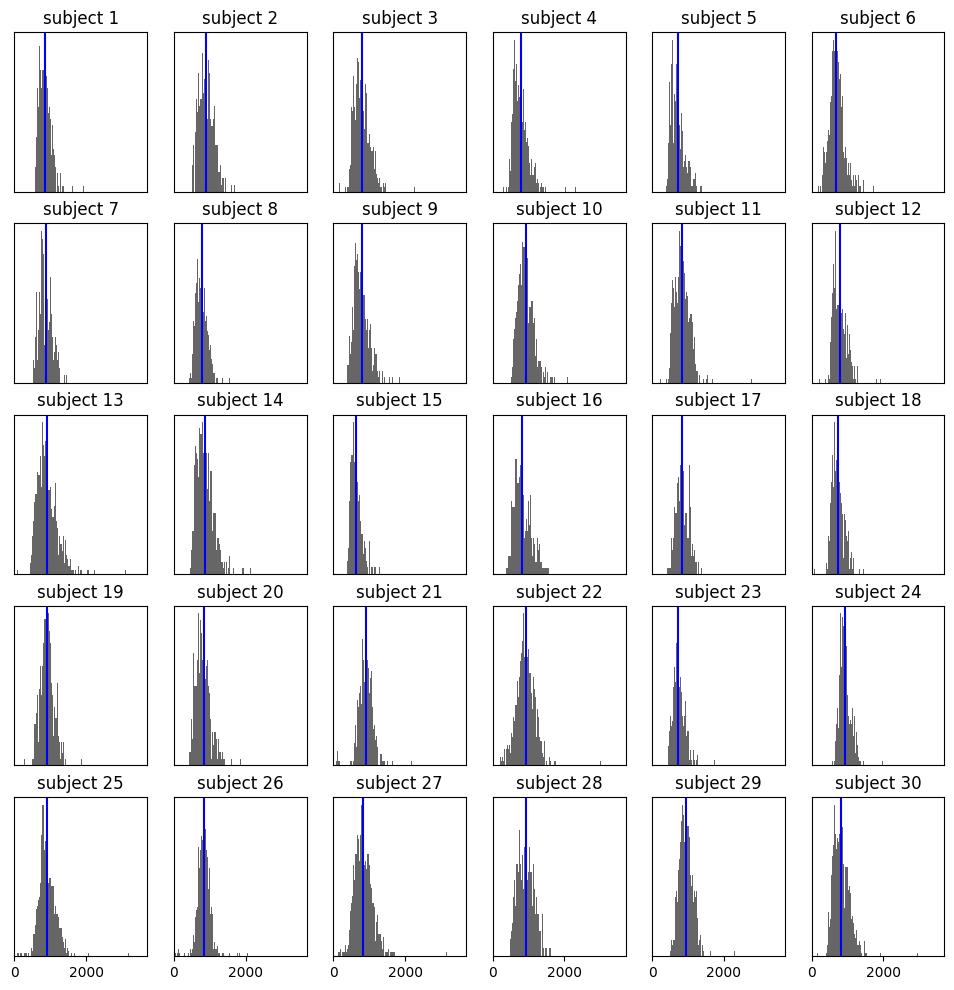

In [3]:
plt.figure(figsize=(12,12))
npy = int(np.ceil(np.sqrt(n_subjects)))
npx = int(np.ceil(n_subjects/npy))
xlims = [0, 500 + 1200 + 2000]

for si,ss in enumerate(subjects):

    plt.subplot(npx, npy, si+1)
    
    rts = np.array(trial_data_all['rt'])[trial_data_all['subject']==ss]
    
    rts = rts[~np.isnan(rts)]
    
    assert(np.all(rts<=xlims[1]))
    
    plt.hist(rts,100, color=[0.4, 0.4, 0.4]);
    
    plt.title('subject %d'%ss)
    
    plt.xlim(xlims)
    if si<((npx-1)*(npy)):
        plt.xticks([])
    plt.yticks([])
    
    plt.axvline(np.mean(rts), color='b')

In [14]:
np.max(rts)

1929.0

In [16]:
np.max(rts)

2703.0

#### Plotting params

In [7]:
cue_level_colors = np.array([[130, 181, 216], [44,92,168]])/255
point_types = ['o','x']
markersize = 4;
xjitters = np.array([-0.2, 0.2])
barwidth = xjitters[1]*2

#### Run stats on the d' values (combine all subjects/all image sets)

In [8]:
vals = dprime_by_condition

print('\nAll subjects:')
print(vals.shape)

aov_table = stats_utils.rmanova_2way(vals, ['cond','image_type'])

print(aov_table)

# then pairwise t-tests (fine vs coarse)
result = scipy.stats.ttest_rel(vals[:,0,:], vals[:,1,:], axis=0, alternative='two-sided')
tvals = result.statistic
pvals = result.pvalue

df = pd.DataFrame(index=image_type_names)
df['t (basic-super)'] = tvals.round(4)
_, pvals_fdr = stats_utils.fdr_keepshape(pvals, alpha=0.01, method='poscorr')
df['p'] = pvals_fdr

df


All subjects:
(30, 2, 5)
                    F Value  Num DF  Den DF        Pr > F
cond               9.807846     1.0    29.0  3.947920e-03
image_type       338.957176     4.0   116.0  5.478614e-63
cond:image_type   15.375488     4.0   116.0  4.064299e-10


,t (basic-super),p
pool1,-3.2177,0.005287
pool2,-5.0430,0.000056
pool3,-5.2173,0.000056
pool4,-1.8649,0.072343
orig,3.0479,0.006097


#### Plot d' values

/user_data/mmhender/featsynth/figures_raw/Color_dprime.pdf


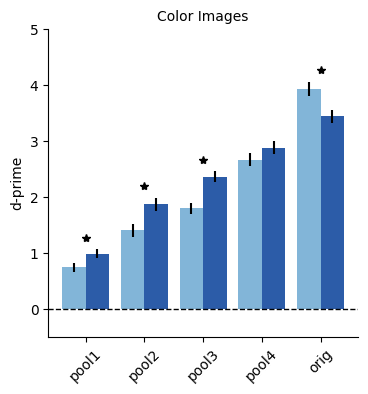

In [9]:
plt.rcParams['pdf.fonttype']=42

plot_utils.set_all_font_sizes(10)
# plt.figure(figsize=(6,4))
plt.figure(figsize=(4,4))

ax = plt.subplot(1,1,1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)



vals = dprime_by_condition

n_subs_plot = vals.shape[0]
    
meanvals = np.mean(vals, axis=0)
semvals = np.std(vals, axis=0)/np.sqrt(n_subs_plot)
  
ax = plt.subplot(1,1,1)


lh = []

for ii in range(n_image_types):
    
    for cc, cue in enumerate(cue_level_names):
    
        h = plt.bar(ii+xjitters[cc], \
                         meanvals[cc,ii], \
                        color = cue_level_colors[cc,:], width=barwidth)
        
        plt.errorbar(ii+xjitters[cc], \
                         meanvals[cc,ii], \
                         semvals[cc,ii], \
                        color = 'k',
                        linestyle='none')
    
        lh.append(h)

    if pvals_fdr[ii]<0.01:
        height = np.max(meanvals[:,ii]+semvals[:,ii])+0.20
        plt.plot(ii, height, '*', color='k')

    
plt.xticks(np.arange(n_image_types), image_type_names, rotation=45)


plt.axhline(0.0, color='k',
            # color=[0.8, 0.8, 0.8],
            linestyle='--', linewidth=1)

plt.ylim([-.5, 5.0])
# assert(np.all(vals<5.0))
# assert(np.all(vals>-0.5))

# ax.legend(lh, cue_level_names, loc='upper left')

plt.ylabel('d-prime')

# plt.title('All subjects (n=%d)'%(n_subs_plot))
plt.title('Color Images')

fn2save = os.path.join(figpath,'Color_dprime.pdf')
print(fn2save)
plt.savefig(fn2save, transparent=True)

#### Check if d' is above chance for each condition

In [10]:
result = scipy.stats.ttest_1samp(dprime_by_condition, popmean = 0, axis=0, alternative = 'greater')
tvals = result.statistic
pvals = result.pvalue
_, pvals_fdr = stats_utils.fdr_keepshape(pvals, alpha=0.01, method='poscorr')
print(tvals)
print(pvals_fdr.round(6))
np.all(pvals_fdr<0.01)

[[ 8.84249168 12.52192257 18.89442674 22.02752553 29.22927643]
 [11.61472153 15.43063699 24.99550042 23.64675616 28.66058694]]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


True

#### pairwise comparisons across image types

In [11]:
pairs_test = list(itertools.combinations(np.arange(5),2))
n_pairs = len(pairs_test)
pair_names = ['%s vs %s'%(image_type_names[ii], image_type_names[jj]) for ii, jj in pairs_test]

tvals = np.zeros((n_pairs))
pvals = np.zeros((n_pairs))

df = pd.DataFrame(index=pair_names)

# averaging across basic/super conds here
vals = np.mean(dprime_by_condition, axis=1)

for pi, pair in enumerate(pairs_test):

    vals1 = vals[:,pair[0]]
    vals2 = vals[:,pair[1]]

    result = scipy.stats.ttest_rel(vals1, vals2, axis=0, alternative='two-sided')
    t = result.statistic
    p = result.pvalue
    # p, t = stats_utils.paired_ttest_nonpar(vals1, vals2, n_iter=10000, rndseed=123434+pi)

    tvals[pi] = t
    pvals[pi] = p

df['t'] = tvals.round(4)

_, pvals_fdr = stats_utils.fdr_keepshape(pvals, alpha=0.01, method='poscorr')
df['p'] = pvals_fdr

df   

,t,p
pool1 vs pool2,-8.6082,1.956796e-09
pool1 vs pool3,-22.7050,1.712341e-19
pool1 vs pool4,-22.2312,2.292395e-19
pool1 vs orig,-34.3569,4.780282e-24
pool2 vs pool3,-5.1597,1.627251e-05
pool2 vs pool4,-11.6438,3.128664e-12
pool2 vs orig,-24.3551,3.704354e-20
pool3 vs pool4,-8.6173,1.956796e-09
pool3 vs orig,-20.8892,1.006749e-18
pool4 vs orig,-10.7905,1.632514e-11


#### Analyze RTs

In [15]:
vals = rt_by_condition

print('\nAll subjects:')
print(vals.shape)

aov_table = stats_utils.rmanova_2way(vals, ['cond','image_type'])

print(aov_table)

# then pairwise t-tests (fine vs coarse)
result = scipy.stats.ttest_rel(vals[:,0,:], vals[:,1,:], axis=0, alternative='two-sided')
t = result.statistic
p = result.pvalue

df = pd.DataFrame(index=image_type_names)
df['t (basic-super)'] = t.round(4)
_, pvals_fdr = stats_utils.fdr_keepshape(p, alpha=0.01, method='poscorr')
df['p'] = pvals_fdr
df


All subjects:
(30, 2, 5)
                    F Value  Num DF  Den DF        Pr > F
cond               8.306237     1.0    29.0  7.364324e-03
image_type       105.670476     4.0   116.0  9.746164e-38
cond:image_type   50.650026     4.0   116.0  1.345056e-24


,t (basic-super),p
pool1,6.7824,4.774990e-07
pool2,4.2084,2.832305e-04
pool3,4.4722,1.827367e-04
pool4,0.7356,4.678701e-01
orig,-7.1480,3.618510e-07


#### plot RTs, all subjects

/user_data/mmhender/featsynth/figures_raw/Color_RTs.pdf


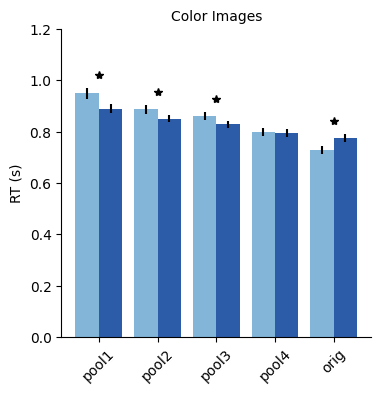

In [17]:
plt.rcParams['pdf.fonttype']=42

plot_utils.set_all_font_sizes(10)
# plt.figure(figsize=(6,4))
plt.figure(figsize=(4,4))

vals = rt_by_condition/1000

n_subs_plot = vals.shape[0]
    
meanvals = np.mean(vals, axis=0)
semvals = np.std(vals, axis=0)/np.sqrt(n_subs_plot)
  
ax = plt.subplot(1,1,1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)



lh = []

for ii in range(n_image_types):
    
    for cc, cue in enumerate(cue_level_names):
    
        h = plt.bar(ii+xjitters[cc], \
                         meanvals[cc,ii], \
                        color = cue_level_colors[cc,:], width=barwidth)
        
        plt.errorbar(ii+xjitters[cc], \
                         meanvals[cc,ii], \
                         semvals[cc,ii], \
                        color = 'k',
                        linestyle='none')
    
        lh.append(h)

    if pvals_fdr[ii]<0.01:
        height = np.max(meanvals[:,ii]+semvals[:,ii])+0.05
        plt.plot(ii, height, '*', color='k')

    
plt.xticks(np.arange(n_image_types), image_type_names, rotation=45)

    
    

# plt.axhline(0.0, color=[0.8, 0.8, 0.8], linestyle='--')

# ax.legend(lh, cue_level_names, loc='upper right')

plt.ylabel('RT (s)')

plt.ylim([0, 1.200])

# plt.title('All subjects (n=%d)'%(n_subs_plot))
plt.title('Color Images')

fn2save = os.path.join(figpath,'Color_RTs.pdf')
print(fn2save)
plt.savefig(fn2save, transparent=True)

#### pairwise comparisons across image types

In [23]:

pairs_test = list(itertools.combinations(np.arange(5),2))
n_pairs = len(pairs_test)
pair_names = ['%s vs %s'%(image_type_names[ii], image_type_names[jj]) for ii, jj in pairs_test]

tvals = np.zeros((n_pairs))
pvals = np.zeros((n_pairs))

df = pd.DataFrame(index=pair_names)


# averaging across basic/super conds here
vals = np.mean(rt_by_condition, axis=1)

for pi, pair in enumerate(pairs_test):

    vals1 = vals[:,pair[0]]
    vals2 = vals[:,pair[1]]

    result = scipy.stats.ttest_rel(vals1, vals2, axis=0, alternative='two-sided')
    t = result.statistic
    p = result.pvalue
    # p, t = stats_utils.paired_ttest_nonpar(vals1, vals2, n_iter=10000, rndseed=132433+pi)

    tvals[pi] = t
    pvals[pi] = p

df['t'] = tvals.round(4)

_, pvals_fdr = stats_utils.fdr_keepshape(pvals, alpha=0.01, method='poscorr')
df['p'] = pvals_fdr


df   

,t,p
pool1 vs pool2,6.0922,1.374691e-06
pool1 vs pool3,7.5492,3.173744e-08
pool1 vs pool4,9.3495,4.946096e-10
pool1 vs orig,11.6583,6.072406e-12
pool2 vs pool3,5.0420,2.256966e-05
pool2 vs pool4,10.2754,8.875424e-11
pool2 vs orig,13.6068,2.607309e-13
pool3 vs pool4,8.3753,4.469571e-09
pool3 vs orig,13.4689,2.607309e-13
pool4 vs orig,9.9187,1.588106e-10


#### Response bias

Text(0.5, 1.0, 'All subjects (n=30)')

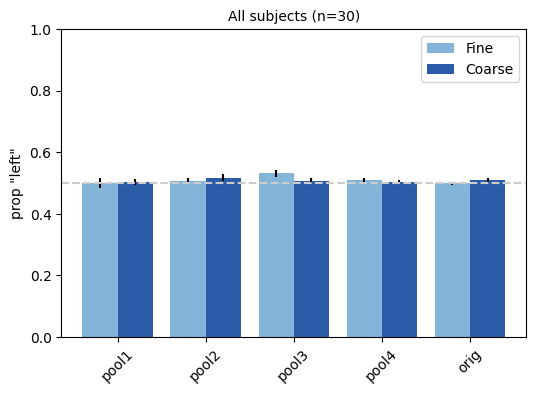

In [24]:
plot_utils.set_all_font_sizes(10)
plt.figure(figsize=(6,4))

vals = propyes_by_condition

n_subs_plot = vals.shape[0]
    
meanvals = np.mean(vals, axis=0)
semvals = np.std(vals, axis=0)/np.sqrt(n_subs_plot)
  
ax = plt.subplot(1,1,1)


lh = []

for ii in range(n_image_types):
    
    for cc, cue in enumerate(cue_level_names):
    
        h = plt.bar(ii+xjitters[cc], \
                         meanvals[cc,ii], \
                        color = cue_level_colors[cc,:], width=barwidth)
        
        plt.errorbar(ii+xjitters[cc], \
                         meanvals[cc,ii], \
                         semvals[cc,ii], \
                        color = 'k',
                        linestyle='none')
    
        lh.append(h)

    
plt.xticks(np.arange(n_image_types), image_type_names, rotation=45)

    
    

plt.axhline(0.5, color=[0.8, 0.8, 0.8], linestyle='--')

ax.legend(lh, cue_level_names, loc='upper right')

plt.ylabel('prop "left"')

plt.ylim([0, 1.0])

plt.title('All subjects (n=%d)'%(n_subs_plot))

#### Natural versus artificial

In [5]:
tvals = np.zeros((n_image_types, n_cue_levels))
pvals = np.zeros((n_image_types, n_cue_levels))

dvals = dprime_by_nat;

df = pd.DataFrame(index=image_type_names)

vals = dvals

result = scipy.stats.ttest_rel(vals[:,:,:,0], vals[:,:,:,1], axis=0, alternative='two-sided')
# want [image types x cue levels]
tvals[:,:] = result.statistic.T
pvals[:,:] = result.pvalue.T
  
_, pvals_fdr = stats_utils.fdr_keepshape(pvals, alpha=0.01, method='poscorr')

for cc, cue in enumerate(cue_level_names):

    df['%s: t'%(cue_level_names[cc])] = tvals[:,cc].round(4)

    df['%s: p'%(cue_level_names[cc])] = pvals_fdr[:,cc]

# print(df)
df

,Fine: t,Fine: p,Coarse: t,Coarse: p
pool1,-3.0761,0.009088,-4.3359,0.000532
pool2,-3.0832,0.009088,-4.3605,0.000532
pool3,-4.3608,0.000532,-2.4824,0.031807
pool4,-1.2981,0.227216,-0.0034,0.997349
orig,1.3232,0.227216,-1.7063,0.140929


/user_data/mmhender/featsynth/figures_raw/Color_NaturalArtificial.pdf


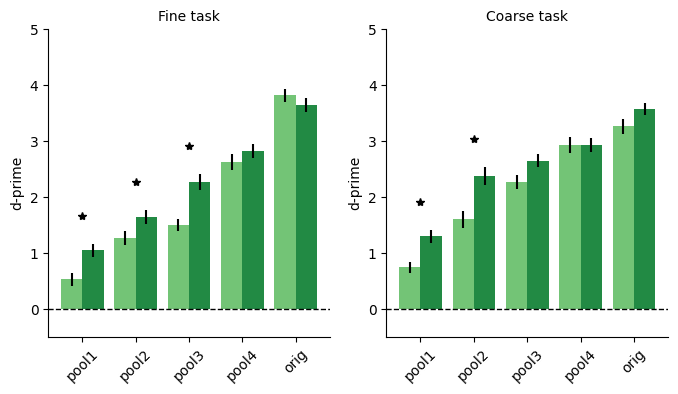

In [6]:
plt.rcParams['pdf.fonttype']=42


plot_utils.set_all_font_sizes(10)


nat_colors = cm.Greens(np.linspace(0,1,5))[[2,3],:]
n_kinds = 2
kind_names = ['Artificial','Natural']

# plt.figure(figsize=(12,4))
plt.figure(figsize=(8,4))

   
for cc in [0,1]:
    
    ax = plt.subplot(1,2,cc+1)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    vals = dprime_by_nat[:,cc,:,:]
    n_subs_plot = vals.shape[0]

    plot_vals = vals;
    meanvals = np.mean(plot_vals, axis=0)
    semvals = np.std(plot_vals, axis=0)/np.sqrt(plot_vals.shape[0])

    lh = []
    
    for kk in range(n_kinds):

        # for si in range(n_subs_plot):

        h = plt.bar(np.arange(n_image_types)+xjitters[kk], \
                 meanvals[:,kk], color=nat_colors[kk,:], width=barwidth)
        
        plt.errorbar(np.arange(n_image_types)+xjitters[kk], \
                                 meanvals[:,kk], \
                                 semvals[:,kk], \
                                color = 'k', linestyle='none')
        lh.append(h)

    for ii in range(n_image_types):
        if pvals_fdr[ii,cc]<0.01:
            height = np.max(meanvals[ii,:]+semvals[ii,:])+0.50
            plt.plot(ii, height, '*', color='k')

    
    plt.xticks(np.arange(n_image_types), image_type_names, rotation=45)


    # plt.axhline(0.0, color=[0.8, 0.8, 0.8], linestyle='--')

    # ax.legend(lh, kind_names, loc='upper left')

    plt.ylabel('d-prime')

    plt.axhline(0.0, color='k',
            # color=[0.8, 0.8, 0.8],
            linestyle='--', linewidth=1)

    plt.ylim([-.5, 5.0])
        
    plt.title('%s task'%(cue_level_names[cc]))

fn2save = os.path.join(figpath,'Color_NaturalArtificial.pdf')
print(fn2save)
plt.savefig(fn2save, transparent=True)

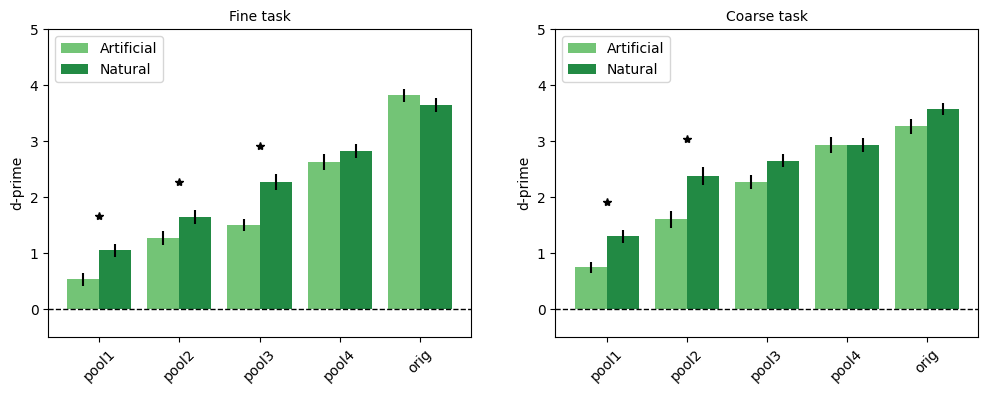

In [6]:
plot_utils.set_all_font_sizes(10)


nat_colors = cm.Greens(np.linspace(0,1,5))[[2,3],:]
n_kinds = 2
kind_names = ['Artificial','Natural']

plt.figure(figsize=(12,4))
   
for cc in [0,1]:
    
    ax = plt.subplot(1,2,cc+1)
    
    vals = dprime_by_nat[:,cc,:,:]
    n_subs_plot = vals.shape[0]

    plot_vals = vals;
    meanvals = np.mean(plot_vals, axis=0)
    semvals = np.std(plot_vals, axis=0)/np.sqrt(plot_vals.shape[0])

    lh = []
    
    for kk in range(n_kinds):

        # for si in range(n_subs_plot):

        h = plt.bar(np.arange(n_image_types)+xjitters[kk], \
                 meanvals[:,kk], color=nat_colors[kk,:], width=barwidth)
        
        plt.errorbar(np.arange(n_image_types)+xjitters[kk], \
                                 meanvals[:,kk], \
                                 semvals[:,kk], \
                                color = 'k', linestyle='none')
        lh.append(h)

    for ii in range(n_image_types):
        if pvals_fdr[ii,cc]<0.01:
            height = np.max(meanvals[ii,:]+semvals[ii,:])+0.50
            plt.plot(ii, height, '*', color='k')

    
    plt.xticks(np.arange(n_image_types), image_type_names, rotation=45)


    # plt.axhline(0.0, color=[0.8, 0.8, 0.8], linestyle='--')

    ax.legend(lh, kind_names, loc='upper left')

    plt.ylabel('d-prime')

    plt.axhline(0.0, color='k',
            # color=[0.8, 0.8, 0.8],
            linestyle='--', linewidth=1)

    plt.ylim([-.5, 5.0])
        
    plt.title('%s task'%(cue_level_names[cc]))

In [7]:
vals = dprime_by_nat
dim_names = ['cond','image_type','naturalness']
stats_utils.rmanova_3way(vals, dim_names)

,F Value,Num DF,Den DF,Pr > F
cond,19.451164,1.0,29.0,1.300466e-04
image_type,328.712518,4.0,116.0,2.811168e-62
naturalness,49.912060,1.0,29.0,9.012532e-08
cond:image_type,15.010449,4.0,116.0,6.464440e-10
cond:naturalness,0.502528,1.0,29.0,4.840519e-01
image_type:naturalness,5.820938,4.0,116.0,2.639657e-04
cond:image_type:naturalness,2.737197,4.0,116.0,3.209377e-02


#### Check if all d' values are above chance

In [8]:
df = pd.DataFrame(index=image_type_names)

vals = dprime_by_nat

result = scipy.stats.ttest_1samp(vals, popmean = 0, axis=0, alternative = 'greater')
tvals = result.statistic
pvals = result.pvalue
_, pvals_fdr = stats_utils.fdr_keepshape(pvals, alpha=0.01, method='poscorr')

# print('(n=%d)'%(cb, vals.shape[0]))
# print(tvals)
print(np.all(pvals_fdr<0.01))

for cc in range(2):
    print(tvals[cc,:,:])
    for kk in range(2):
        df['%s, %s: p<0.01'%(cue_level_names[cc], kind_names[kk])] = \
            pvals_fdr[cc,:,kk]<0.01

df

True
[[ 4.53719649  8.59525433]
 [ 9.89821195 12.56967581]
 [12.87357252 15.97897128]
 [18.31923296 21.64317223]
 [30.93218059 29.45662403]]
[[ 7.55574012 11.03041039]
 [10.61989069 15.1795643 ]
 [17.7760505  22.65007842]
 [19.87232429 22.68145319]
 [23.45325343 32.14040748]]


,"Fine, Artificial: p<0.01","Fine, Natural: p<0.01","Coarse, Artificial: p<0.01","Coarse, Natural: p<0.01"
pool1,True,True,True,True
pool2,True,True,True,True
pool3,True,True,True,True
pool4,True,True,True,True
orig,True,True,True,True


#### Natural versus artificial: RTs

In [9]:
tvals = np.zeros((n_image_types, n_cue_levels))
pvals = np.zeros((n_image_types, n_cue_levels))

vals = rt_by_nat;

df = pd.DataFrame(index=image_type_names)

result = scipy.stats.ttest_rel(vals[:,:,:,0], vals[:,:,:,1], axis=0, alternative='two-sided')
# want [image types x cue levels]
tvals[:,:] = result.statistic.T
pvals[:,:] = result.pvalue.T
  
_, pvals_fdr = stats_utils.fdr_keepshape(pvals, alpha=0.01, method='poscorr')

for cc, cue in enumerate(cue_level_names):

    df['%s: t'%(cue_level_names[cc])] = tvals[:,cc].round(4)

    df['%s: p'%(cue_level_names[cc])] = pvals_fdr[:,cc]

# print(df)
df

,Fine: t,Fine: p,Coarse: t,Coarse: p
pool1,3.5339,0.001743,5.6253,0.000045
pool2,4.5676,0.000140,3.1622,0.004060
pool3,4.8553,0.000140,4.7054,0.000140
pool4,4.6100,0.000140,4.1291,0.000402
orig,0.8829,0.384567,4.5715,0.000140


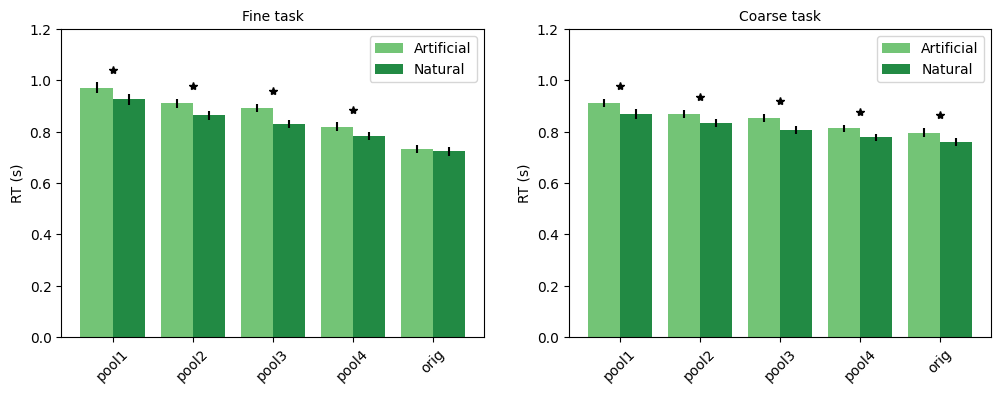

In [10]:
plot_utils.set_all_font_sizes(10)

nat_colors = cm.Greens(np.linspace(0,1,5))[[2,3],:]
n_kinds = 2
kind_names = ['Artificial','Natural']

plt.figure(figsize=(12,4))
   
for cc in [0,1]:
    
    ax = plt.subplot(1,2,cc+1)
    
    vals = rt_by_nat[:,cc,:,:]/1000
    
    n_subs_plot = vals.shape[0]

    plot_vals = vals;
    meanvals = np.mean(plot_vals, axis=0)
    semvals = np.std(plot_vals, axis=0)/np.sqrt(plot_vals.shape[0])

    lh = []
    
    for kk in range(n_kinds):

        # for si in range(n_subs_plot):

        h = plt.bar(np.arange(n_image_types)+xjitters[kk], \
                 meanvals[:,kk], color=nat_colors[kk,:], width=barwidth)
        
        plt.errorbar(np.arange(n_image_types)+xjitters[kk], \
                                 meanvals[:,kk], \
                                 semvals[:,kk], \
                                color = 'k', linestyle='none')
        lh.append(h)

    for ii in range(n_image_types):
        if pvals_fdr[ii,cc]<0.01:
            height = np.max(meanvals[ii,:]+semvals[ii,:])+0.05
            plt.plot(ii, height, '*', color='k')

    
    plt.xticks(np.arange(n_image_types), image_type_names, rotation=45)


    # plt.axhline(0.0, color=[0.8, 0.8, 0.8], linestyle='--')

    ax.legend(lh, kind_names, loc='upper right')

    plt.ylabel('RT (s)')

    # plt.axhline(0.0, color='k',
    #         # color=[0.8, 0.8, 0.8],
    #         linestyle='--', linewidth=1)

    plt.ylim([0, 1.200])
        
    plt.title('%s task'%(cue_level_names[cc]))

In [11]:
vals = rt_by_nat
dim_names = ['cond','image_type','naturalness']
stats_utils.rmanova_3way(vals, dim_names)

,F Value,Num DF,Den DF,Pr > F
cond,8.301749,1.0,29.0,7.378422e-03
image_type,105.648271,4.0,116.0,9.839388e-38
naturalness,70.775483,1.0,29.0,2.850493e-09
cond:image_type,50.544435,4.0,116.0,1.451556e-24
cond:naturalness,0.000058,1.0,29.0,9.939923e-01
image_type:naturalness,2.816819,4.0,116.0,2.836598e-02
cond:image_type:naturalness,2.159296,4.0,116.0,7.791946e-02


#### Analyze individual super-categories

False
/user_data/mmhender/featsynth/figures_raw/Color_pool1_indivcategs.pdf


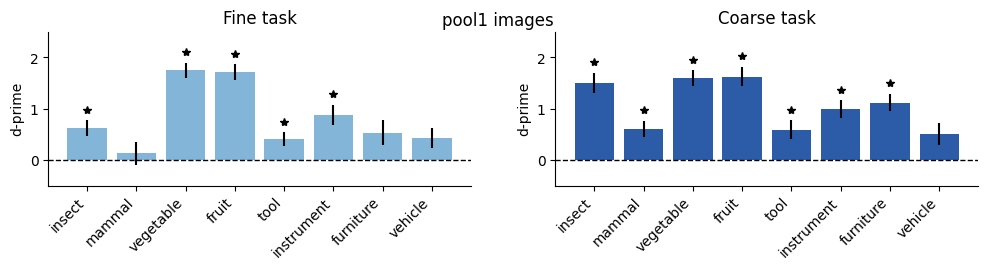

In [4]:
plt.rcParams['pdf.fonttype']=42


vals = dprime_by_supcat

result = scipy.stats.ttest_1samp(vals, popmean = 0, axis=0, alternative = 'greater')
tvals = result.statistic
pvals = result.pvalue
_, pvals_fdr = stats_utils.fdr_keepshape(pvals, alpha=0.01, method='poscorr')

print(np.all(pvals_fdr<0.01))


for ii in [0]:


    plt.figure(figsize=(12,2))

    d = dprime_by_supcat[:,:,ii,:]
    n_super = d.shape[2]

    # t, p = scipy.stats.ttest_rel(d[:,0,:], d[:,1,:], axis=0, alternative='two-sided')

    meanvals = np.mean(d, axis=0)
    semvals = np.std(d, axis=0)/np.sqrt(d.shape[0])
    
    for cc in [0,1]:
            
        ax = plt.subplot(1,2,cc+1)

        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

    
        x = np.arange(n_super)

        h = plt.bar(x, meanvals[cc,:], color=cue_level_colors[cc,:])

        # lh.append(h)

        plt.errorbar(x, meanvals[cc,:], semvals[cc,:], linestyle='none', color='k')

        # vals = d[:,cc,:]
        # t, p = scipy.stats.ttest_1samp(vals, popmean=0, alternative='greater')

        for sc in range(n_super):

            if pvals_fdr[cc,ii,sc]<0.01:
                height = meanvals[cc,sc]+semvals[cc,sc]+0.20
                plt.plot(x[sc], height, '*', color='k')
    
        plt.xticks(np.arange(n_super), super_names_plot, rotation=45, ha='right');
    
        plt.ylabel('d-prime')
    
        plt.axhline(0.0, color='k',
                # color=[0.8, 0.8, 0.8],
                linestyle='--', linewidth=1)
    
        plt.ylim([-.5, 2.5])

        plt.title('%s task'%cue_level_names[cc])
        # ax.legend(lh, cue_level_names, loc='upper left')


    # plt.axhline(0, color=[0.8, 0.8, 0.8])

    plt.suptitle('%s images'%(image_type_names[ii]))

    # plt.title('Color Images')
    
    fn2save = os.path.join(figpath,'Color_%s_indivcategs.pdf'%image_type_names[ii])
    print(fn2save)
    plt.savefig(fn2save, transparent=True)

False


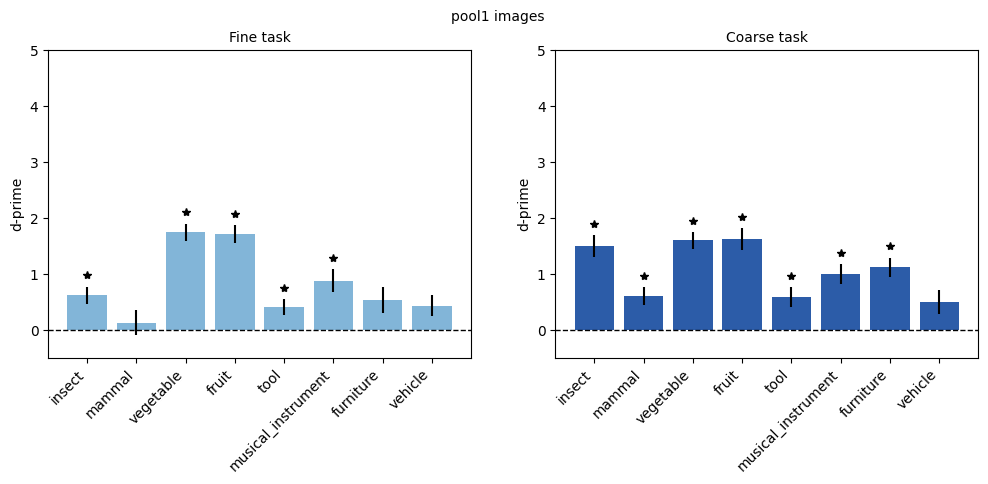

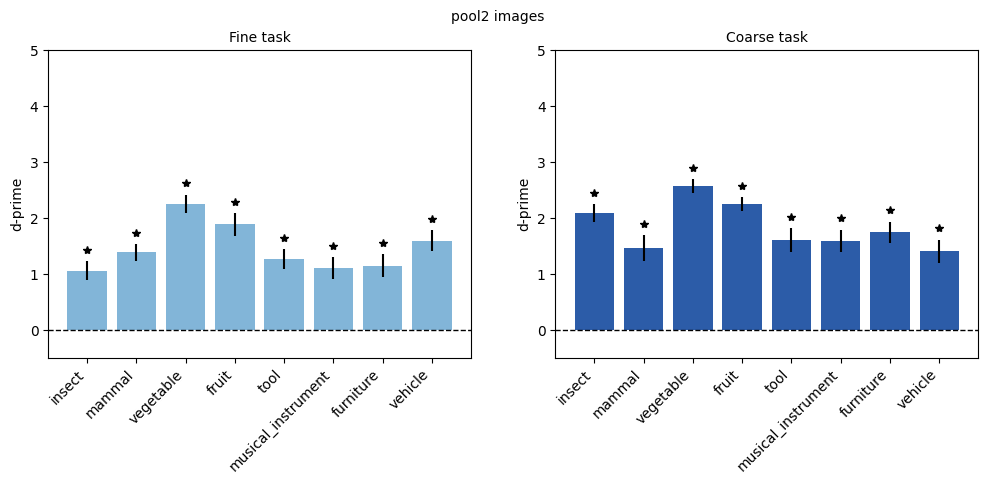

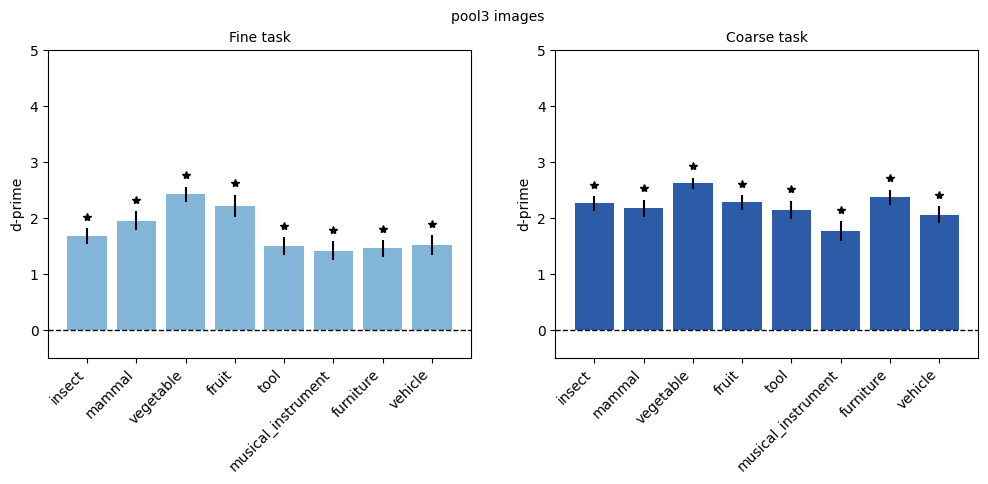

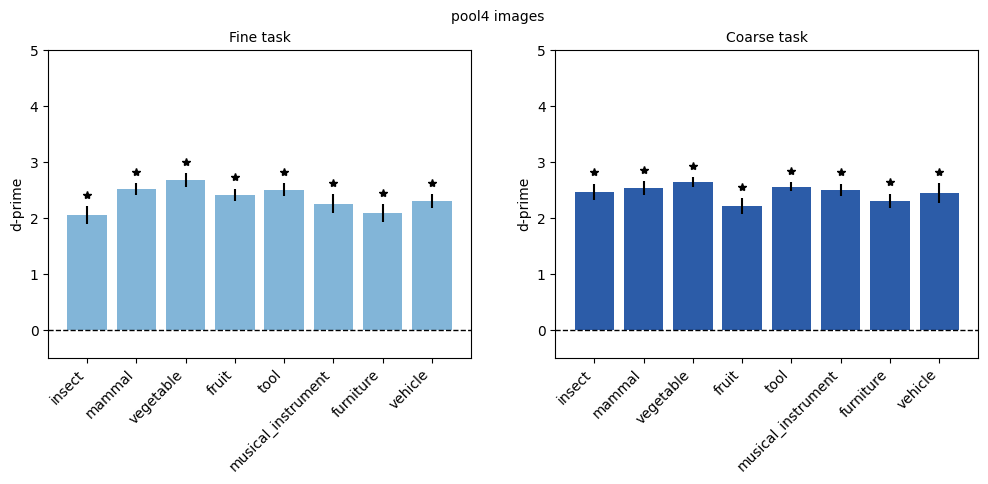

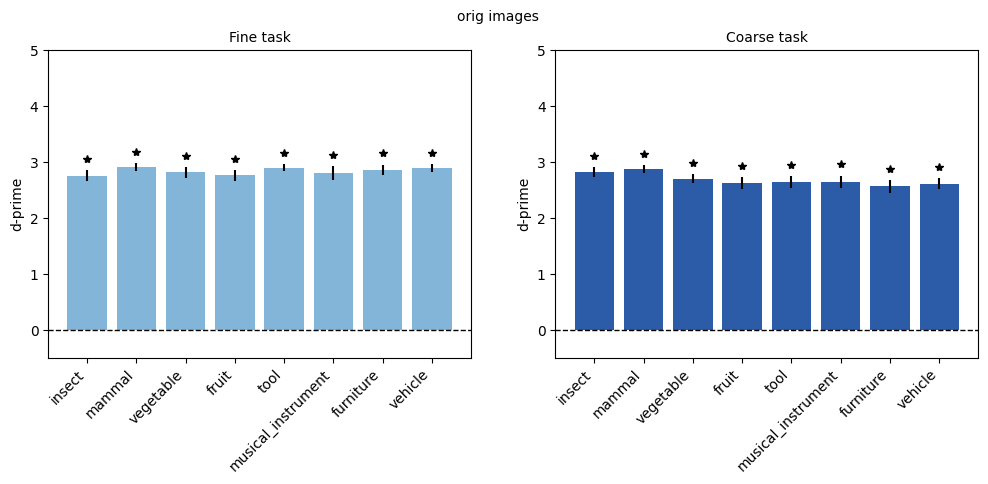

In [18]:

vals = dprime_by_supcat

result = scipy.stats.ttest_1samp(vals, popmean = 0, axis=0, alternative = 'greater')
tvals = result.statistic
pvals = result.pvalue
_, pvals_fdr = stats_utils.fdr_keepshape(pvals, alpha=0.01, method='poscorr')

print(np.all(pvals_fdr<0.01))


for ii in range(5):


    plt.figure(figsize=(12,4))

    d = dprime_by_supcat[:,:,ii,:]
    n_super = d.shape[2]

    # t, p = scipy.stats.ttest_rel(d[:,0,:], d[:,1,:], axis=0, alternative='two-sided')

    meanvals = np.mean(d, axis=0)
    semvals = np.std(d, axis=0)/np.sqrt(d.shape[0])
    
    for cc in [0,1]:
            
        ax = plt.subplot(1,2,cc+1)
    
        x = np.arange(n_super)

        h = plt.bar(x, meanvals[cc,:], color=cue_level_colors[cc,:])

        # lh.append(h)

        plt.errorbar(x, meanvals[cc,:], semvals[cc,:], linestyle='none', color='k')

        # vals = d[:,cc,:]
        # t, p = scipy.stats.ttest_1samp(vals, popmean=0, alternative='greater')

        for sc in range(n_super):

            if pvals_fdr[cc,ii,sc]<0.01:
                height = meanvals[cc,sc]+semvals[cc,sc]+0.20
                plt.plot(x[sc], height, '*', color='k')
    
        plt.xticks(np.arange(n_super), super_names, rotation=45, ha='right');
    
        plt.ylabel('d-prime')
    
        plt.axhline(0.0, color='k',
                # color=[0.8, 0.8, 0.8],
                linestyle='--', linewidth=1)
    
        plt.ylim([-.5, 5.0])

        plt.title('%s task'%cue_level_names[cc])
        # ax.legend(lh, cue_level_names, loc='upper left')


    # plt.axhline(0, color=[0.8, 0.8, 0.8])

    plt.suptitle('%s images'%(image_type_names[ii]))

False


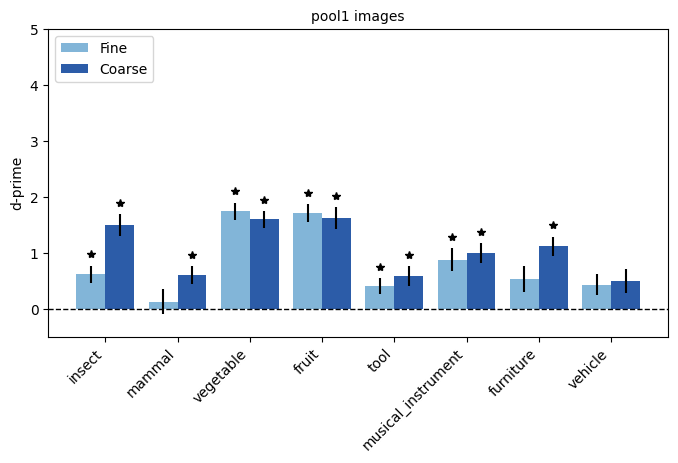

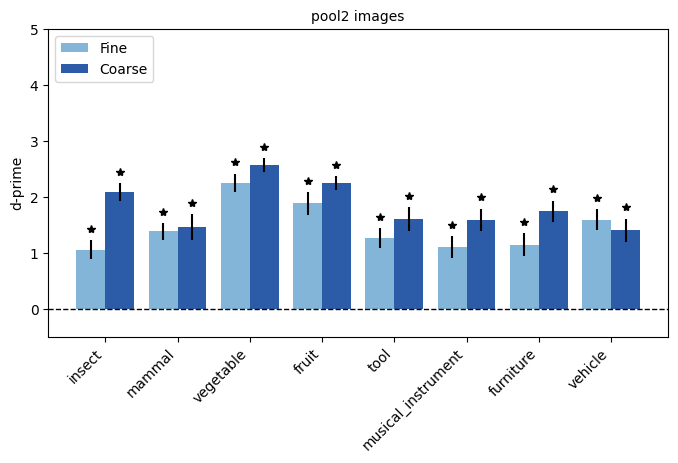

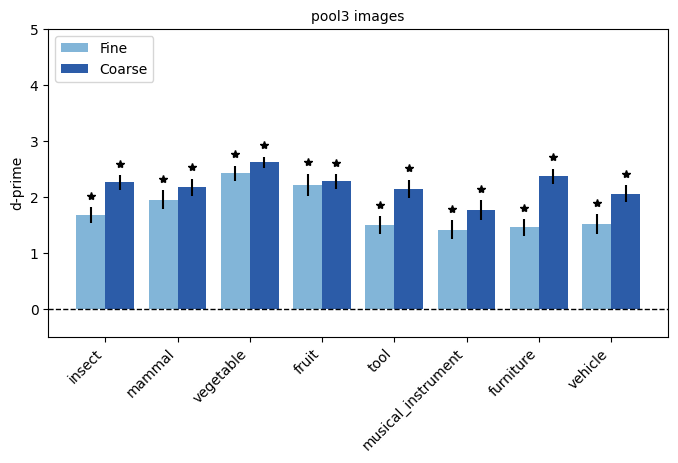

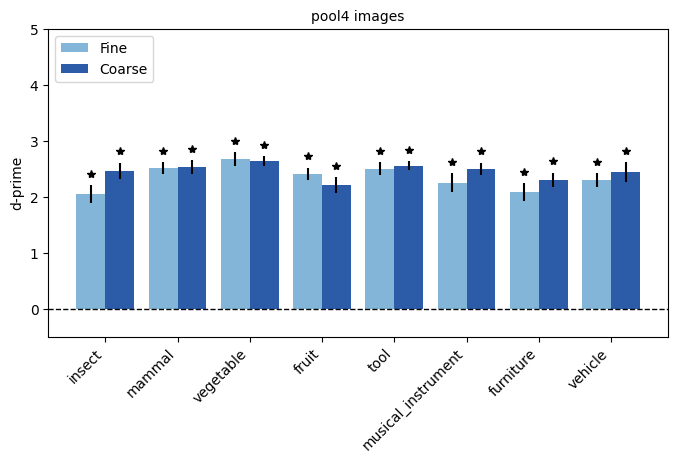

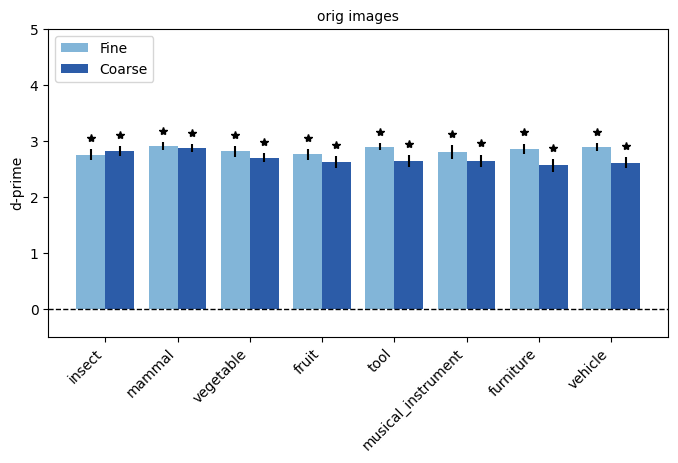

In [31]:

vals = dprime_by_supcat

result = scipy.stats.ttest_1samp(vals, popmean = 0, axis=0, alternative = 'greater')
tvals = result.statistic
pvals = result.pvalue
_, pvals_fdr = stats_utils.fdr_keepshape(pvals, alpha=0.01, method='poscorr')

print(np.all(pvals_fdr<0.01))


for ii in range(5):


    plt.figure(figsize=(8,4))

    ax = plt.subplot(1,1,1)

    d = dprime_by_supcat[:,:,ii,:]
    n_super = d.shape[2]

    # t, p = scipy.stats.ttest_rel(d[:,0,:], d[:,1,:], axis=0, alternative='two-sided')

    meanvals = np.mean(d, axis=0)
    semvals = np.std(d, axis=0)/np.sqrt(d.shape[0])

    lh = []
    for cc in [0,1]:

        x = np.arange(n_super)+xjitters[cc]

        h = plt.bar(x, meanvals[cc,:], color=cue_level_colors[cc,:], width=xjitters[1]*2)

        lh.append(h)

        plt.errorbar(x, meanvals[cc,:], semvals[cc,:], linestyle='none', color='k')

        # vals = d[:,cc,:]
        # t, p = scipy.stats.ttest_1samp(vals, popmean=0, alternative='greater')

        for sc in range(n_super):

            if pvals_fdr[cc,ii,sc]<0.01:
                height = meanvals[cc,sc]+semvals[cc,sc]+0.20
                plt.plot(x[sc], height, '*', color='k')

    plt.xticks(np.arange(n_super), super_names, rotation=45, ha='right');

    plt.ylabel('d-prime')

    plt.axhline(0.0, color='k',
            # color=[0.8, 0.8, 0.8],
            linestyle='--', linewidth=1)

    plt.ylim([-.5, 5.0])

    ax.legend(lh, cue_level_names, loc='upper left')


    # plt.axhline(0, color=[0.8, 0.8, 0.8])

    plt.title('%s images'%(image_type_names[ii]))